#Importing Necessary Libraries

In [261]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Loading the Dataset

In [262]:
df = pd.read_csv("/content/housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


#Data Analysis

In [263]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [264]:
df.dropna(inplace=True)

In [265]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

#Splitting the dataset

In [266]:
from sklearn.model_selection import train_test_split
X = df.drop(columns= ['median_house_value'],axis=1)
y = df['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

#Preprocessing the training dataset

In [267]:
train_df = X_train.join(y_train)

In [268]:
train_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
9856,-121.86,36.58,20.0,6332.0,991.0,2668.0,955.0,5.7578,<1H OCEAN,347700.0
11070,-117.85,33.84,17.0,2830.0,502.0,1370.0,459.0,5.1785,<1H OCEAN,247300.0
3745,-118.40,34.16,34.0,2638.0,580.0,1150.0,551.0,4.2989,<1H OCEAN,364700.0
14041,-117.14,32.75,27.0,1551.0,464.0,880.0,400.0,2.4167,NEAR OCEAN,131300.0
5502,-118.43,33.98,19.0,8324.0,1590.0,2927.0,1538.0,7.5426,<1H OCEAN,351700.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

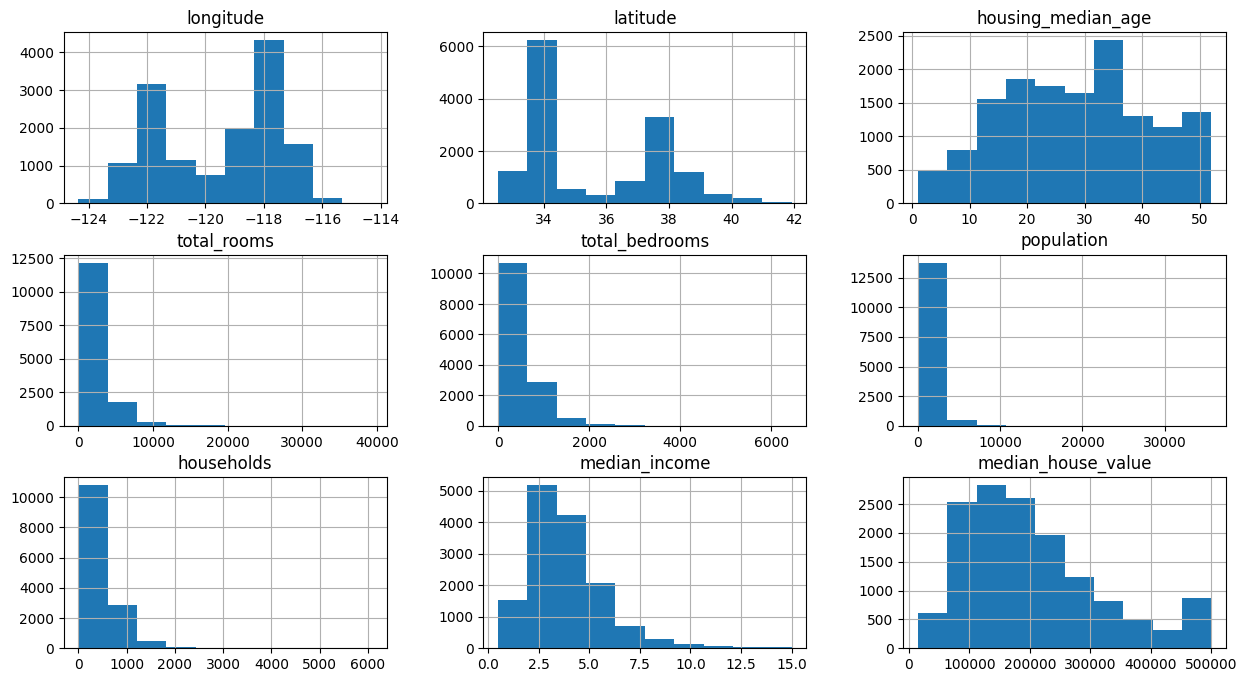

In [269]:
train_df.hist(figsize=(15,8))

<ipython-input-270-07b3ae2b6b5d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_df.corr(),annot=True,cmap='Pastel1')


<Axes: >

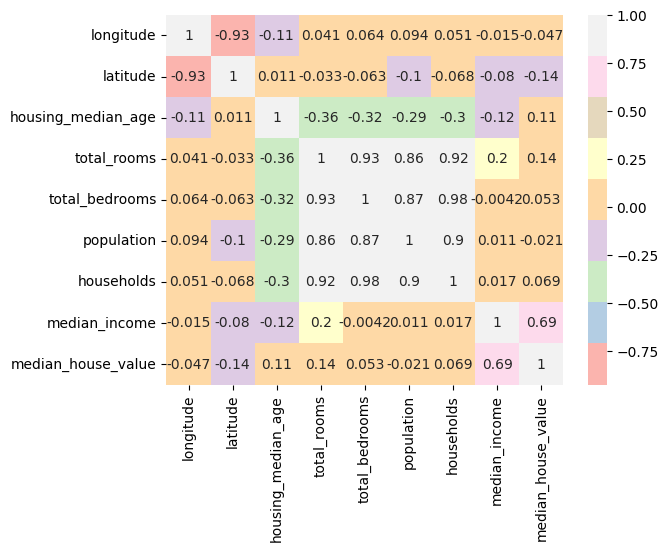

In [270]:
sns.heatmap(train_df.corr(),annot=True,cmap='Pastel1')

In [271]:
train_df['total_rooms'] = np.log(train_df['total_rooms']+1)
train_df['total_bedrooms'] = np.log(train_df['total_bedrooms']+1)
train_df['population'] = np.log(train_df['population']+1)
train_df['households'] = np.log(train_df['households']+1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

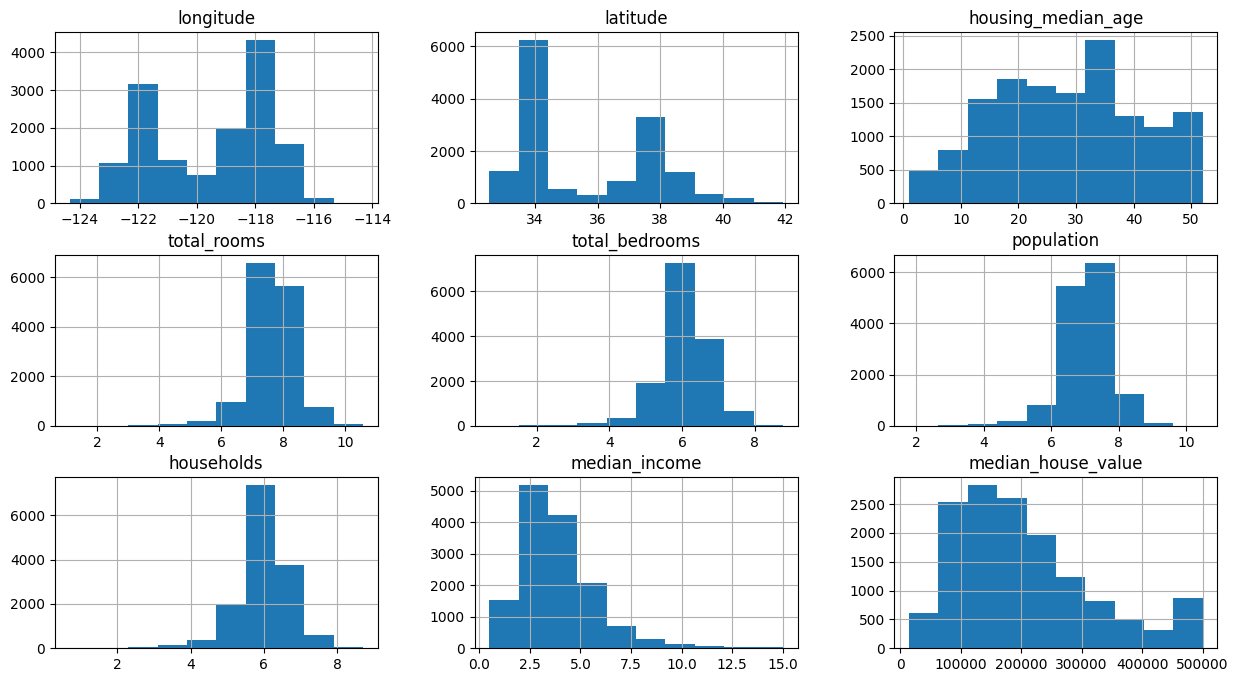

In [272]:
train_df.hist(figsize=(15,8))

In [273]:
train_df['ocean_proximity'].value_counts()

<1H OCEAN     6320
INLAND        4528
NEAR OCEAN    1847
NEAR BAY      1606
ISLAND           2
Name: ocean_proximity, dtype: int64

In [274]:
train_df = train_df.join(pd.get_dummies(train_df['ocean_proximity'])).drop(['ocean_proximity'],axis=1)

In [275]:
train_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
9856,-121.86,36.58,20.0,8.753529,6.899723,7.889459,6.862758,5.7578,347700.0,1,0,0,0,0
11070,-117.85,33.84,17.0,7.948385,6.220590,7.223296,6.131226,5.1785,247300.0,1,0,0,0,0
3745,-118.40,34.16,34.0,7.878155,6.364751,7.048386,6.313548,4.2989,364700.0,1,0,0,0,0
14041,-117.14,32.75,27.0,7.347300,6.142037,6.781058,5.993961,2.4167,131300.0,0,0,0,0,1
5502,-118.43,33.98,19.0,9.027018,7.372118,7.982075,7.338888,7.5426,351700.0,1,0,0,0,0


<Axes: >

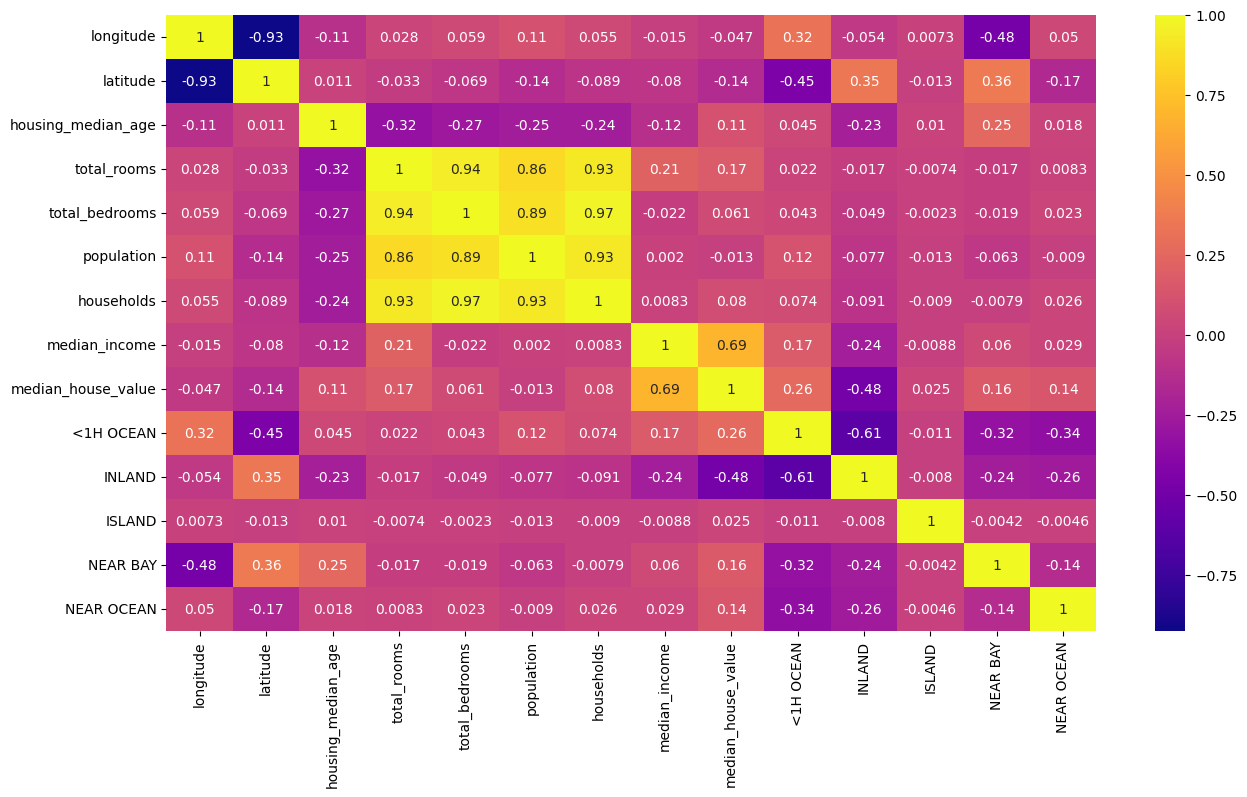

In [276]:
plt.figure(figsize=(15,8))
sns.heatmap(train_df.corr(),annot=True,cmap='plasma')

In [277]:
train_df['bedroom_ratio'] = train_df['total_bedrooms']/train_df['total_rooms']
train_df['household_rooms'] = train_df['total_rooms']/train_df['households']

<Axes: >

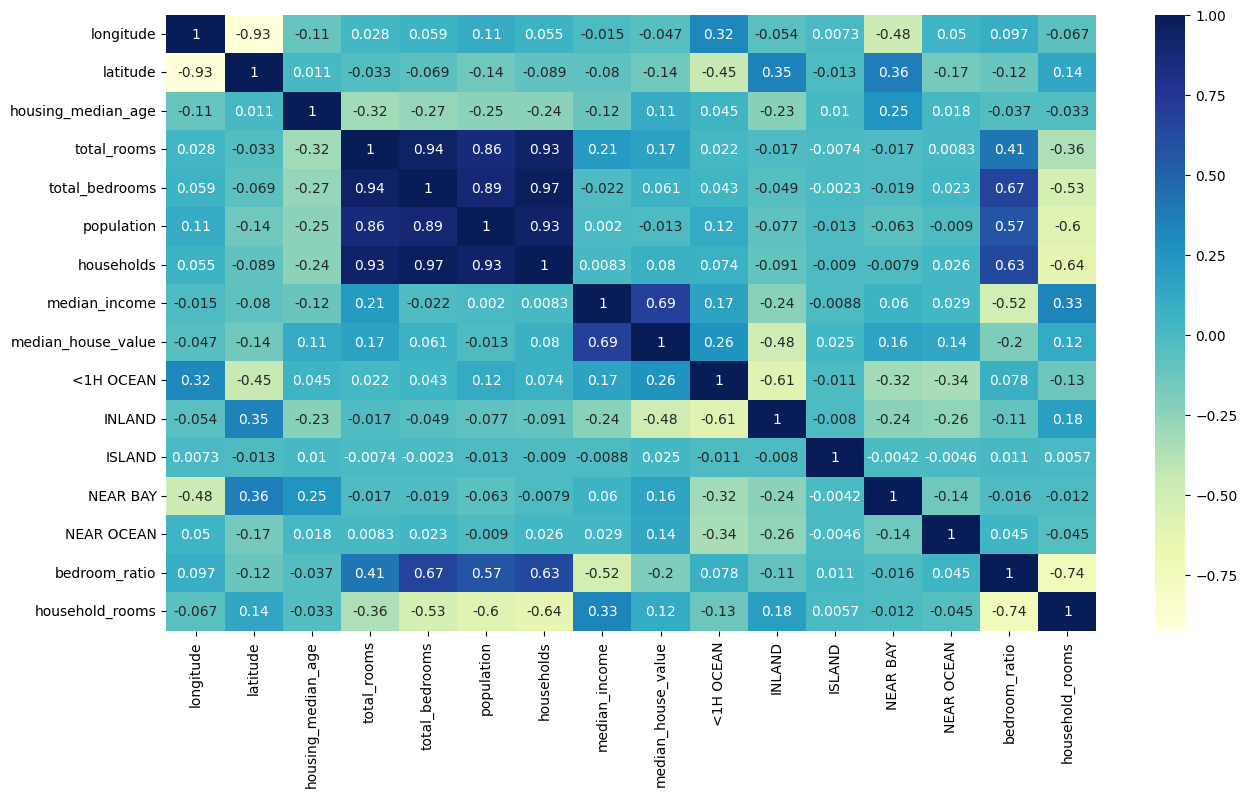

In [278]:
plt.figure(figsize=(15,8))
sns.heatmap(train_df.corr(),annot=True,cmap='YlGnBu')

#Scaling the data

In [301]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = train_df.drop(['median_house_value'],axis=1).values
y_train = train_df['median_house_value'].values
X_train_s = sc.fit_transform(X_train)

#Preprocesing the test dataset.

In [280]:
test_df = X_test.join(y_test)

In [281]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6130 entries, 14185 to 15781
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           6130 non-null   float64
 1   latitude            6130 non-null   float64
 2   housing_median_age  6130 non-null   float64
 3   total_rooms         6130 non-null   float64
 4   total_bedrooms      6130 non-null   float64
 5   population          6130 non-null   float64
 6   households          6130 non-null   float64
 7   median_income       6130 non-null   float64
 8   ocean_proximity     6130 non-null   object 
 9   median_house_value  6130 non-null   float64
dtypes: float64(9), object(1)
memory usage: 655.8+ KB


In [282]:
test_df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

In [283]:
test_df['total_rooms'] = np.log(test_df['total_rooms']+1)
test_df['total_bedrooms'] = np.log(test_df['total_bedrooms']+1)
test_df['population'] = np.log(test_df['population']+1)
test_df['households'] = np.log(test_df['households']+1)

In [284]:
test_df['ocean_proximity'].value_counts()

<1H OCEAN     2714
INLAND        1968
NEAR OCEAN     781
NEAR BAY       664
ISLAND           3
Name: ocean_proximity, dtype: int64

In [285]:
test_df = test_df.join(pd.get_dummies(test_df['ocean_proximity'])).drop(['ocean_proximity'],axis=1)

In [286]:
test_df.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
14185,-117.08,32.70,37.0,7.685703,6.037871,7.171657,5.929589,2.8750,98900.0,0,0,0,0,1
6125,-117.91,34.11,20.0,8.058011,6.529419,7.781973,6.570883,3.5250,153000.0,1,0,0,0,0
14095,-117.10,32.75,11.0,7.780721,6.588926,7.552762,6.568078,1.3448,91300.0,0,0,0,0,1


<Axes: >

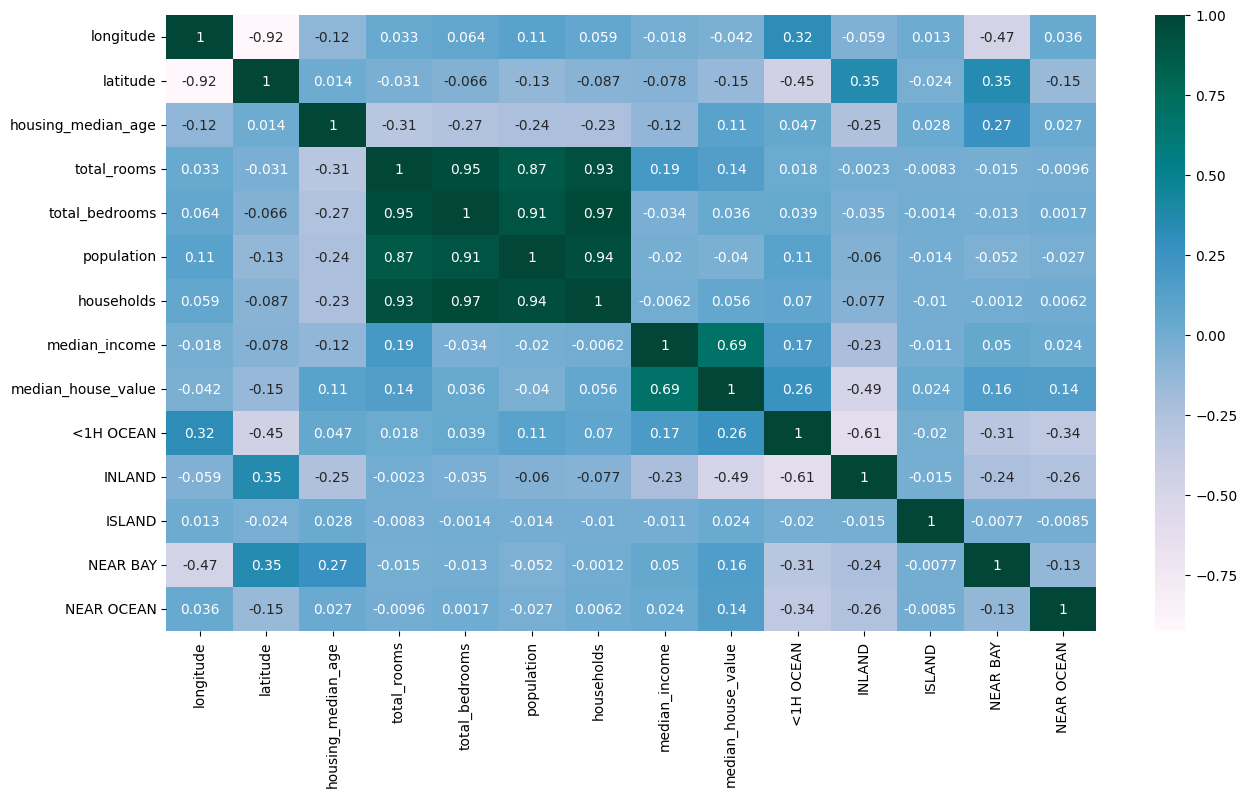

In [287]:
plt.figure(figsize=(15,8))
sns.heatmap(test_df.corr(),annot=True,cmap='PuBuGn')

In [288]:
test_df['bedroom_ratio'] = test_df['total_bedrooms']/test_df['total_rooms']
test_df['household_rooms'] = test_df['total_rooms']/test_df['households']

<Axes: >

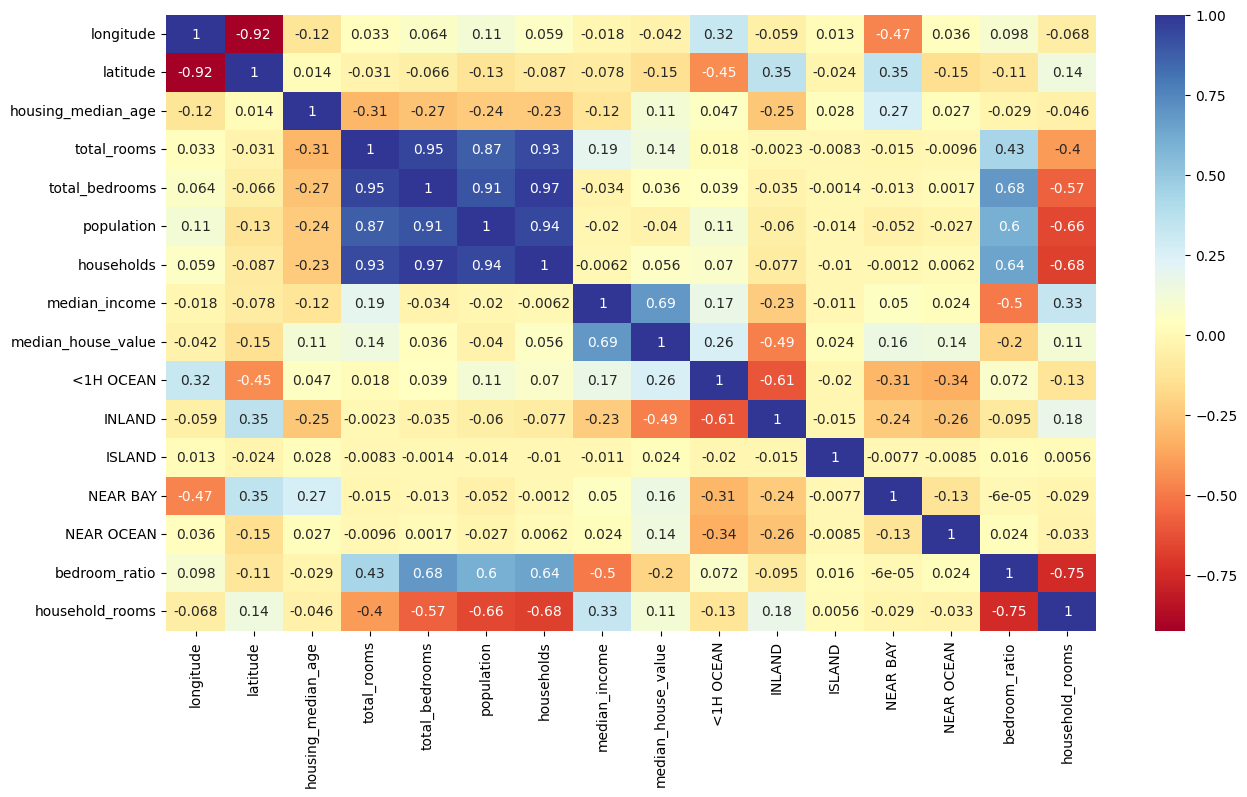

In [289]:
plt.figure(figsize=(15,8))
sns.heatmap(test_df.corr(),annot=True,cmap='RdYlBu')

In [302]:
X_test = test_df.drop(['median_house_value'],axis=1).values
y_test = test_df['median_house_value'].values
X_test_s = sc.fit_transform(X_test)

#Building the Random Forest Regressor Model

In [303]:
from sklearn.ensemble import RandomForestRegressor
rg = RandomForestRegressor()
rg.fit(X_train_s,y_train)

RandomForestRegressor()

In [304]:
rg.score(X_test_s,y_test)

0.7718437806113625

In [305]:
from sklearn.metrics import r2_score
r2_score(y_test,rg.predict(X_test_s))

0.7718437806113625